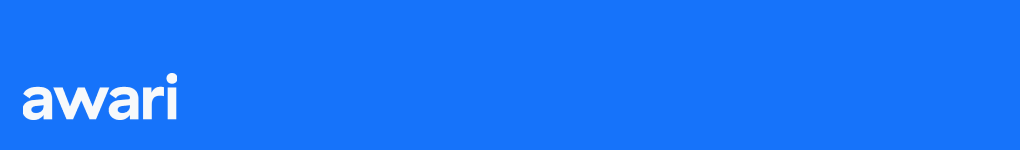

Prática da **Aula 07: Estatística Descritiva I**, do curso de **Data Science** da **[Awari](https://awari.com.br/)**. Para utilizá-la, vá no menu "Arquivo" e, em seguida, na opção "Salvar uma cópia no Drive". Isto criará uma cópia deste notebook em uma pasta chamada "Colab Notebooks", no seu Google Drive pessoal. Use a cópia para criar novas células de código ou executar as células desta prática.

---

# **Manipulação avançada de dados**

## **Objetivo**

Nesta prática, veremos algumas operações mais avançadas que **Pandas** nos permite aplicar sobre bases de dados. Entre elas, como mesclar ou unir dataframes e como reorganizá-los e agregá-los de outras maneiras que facilitam nossas análises.

## **Prática**

### **Importando bibliotecas**

Vamos usar Pandas e Numpy:

In [ ]:
import pandas as pd
import numpy as np

### **Criando DataFrames**

Aqui, criaremos os DataFrames que usaremos:

In [ ]:
# DataFrame 1
d1 = {'id_cliente':pd.Series([1,2,3,4,5,6]),
  'produto':pd.Series(['Fogão','Fogão','Fogão','Televisão','Televisão','Televisão'])}
df1 = pd.DataFrame(d1)


# DataFrame 2
d2 = {'id_cliente':pd.Series([2,4,6,7,8]),
    'estado':pd.Series(['Rio de Janeiro','Rio de Janeiro','Bahia','Goiás','Paraná'])}
df2 = pd.DataFrame(d2)

In [ ]:
df1

In [ ]:
df2

### **Operações com DataFrames**

#### **`merge`**

##### INNER JOIN

Retorna apenas as linhas da interseção entre a tabela da esquerda e a tabela da direita. Em outras palavras, retorna apenas o que está na tabela à esquerda e na tabela a direita.

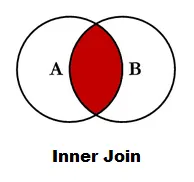

In [ ]:
pd.merge(df1, df2, on='id_cliente', how='inner')


##### OUTER JOIN

Retorna todas as linhas de ambas as tabelas, une os registros da esquerda que possuem chaves correspondentes na tabela da direita. Quando não houver correspondência de nenhuma tabela, `NaN` é retornado.

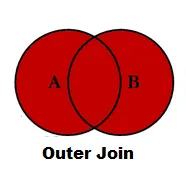

In [ ]:
pd.merge(df1, df2, on='id_cliente', how='outer')

##### LEFT JOIN

Retorna todas as linhas da tabela à esquerda e todas as linhas com chaves correspondentes da tabela à direita. Quando não houver correspondência da tabela à direita, `NaN` é retornado.

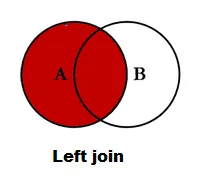






In [ ]:
pd.merge(df1, df2, on='id_cliente', how='left')

##### RIGHT JOIN

Retorne todas as linhas da tabela à direita e todas as linhas com chaves correspondentes da tabela à esquerda. Quando não houver correspondência da tabela à direita, `NaN` é retornado.

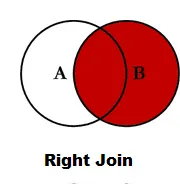

In [ ]:
pd.merge(df1, df2, on='id_cliente', how='right')

#### **`concat`**

Concatena duas tabelas e mantém o índice antigo:



In [ ]:
pd.concat([df1, df2])

Concatena duas tabelas e altera o índice, reindexando:



In [ ]:
pd.concat([df1, df2], ignore_index=True)

Concatena ambas as tabelas com base em seu índice de coluna. `axis = 1` indica que a concatenação deve ser feita com base no índice da coluna:





In [ ]:
pd.concat([df1,df2], axis=1)

#### **`groupby`**

Conjuntos de dados raramente chegam da maneira que precisamos. As transformações são necessárias e as agregações são inevitáveis.

Para agregar dados e ser capaz de extrair  *insights* deles utilizamos o método `groupby()`

##### Dividir dados em grupos

Usaremos novamente o dataset do naufrágio do Titanic para exemplo:

In [ ]:
dados = 'https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv'

df = pd.read_csv(dados)

In [ ]:
# Agrupando os dados pela média da coluna `Sex`
df.groupby('Sex').mean()

Para retomar a categoria "sexo" como uma coluna, usamos o parâmetro `reset_index`:



In [ ]:
df.groupby('Sex').mean().reset_index()


##### Agrupar por mais de uma coluna

Permite ver a taxa de sobrevivência por sexo, por exemplo. Para isso, podemos agrupar por `Sex` e `Survived`:



In [ ]:
df.groupby(['Sex', 'Survived'] )['Survived'].count()


#### **`unstack`**

Transforma valores de índice em nomes de coluna. Muito grosseiramente, podemos dizer que ele transpõe e agrega o quadro de dados.

Por exemplo, se quisermos ver a distribuição interna dos sobreviventes em cada grupo baseado em sexo, achataremos o quadro de dados usando o método `unstack()`:

In [ ]:
df.groupby(['Sex', 'Survived'] )['Survived'].count().unstack('Sex')


#### **`pivot_table`**

Resume os valores de um recurso em uma tabela bidimensional organizada -- recurso idêntico ao das "tabelas dinâmicas" do Microsoft Excel.

##### Agrupar dados usando índice em uma tabela dinâmica

In [ ]:
pd.pivot_table(data=df,index=['Sex'])

##### Pivot multi-índice

In [ ]:
pd.pivot_table(df,index=['Sex','Pclass'])


##### Função de agregação diferente para diferentes recursos

Os valores mostrados na tabela são o resultado da sumarização que `aggfunc` aplica aos dados do recurso.

`aggfunc` é uma função agregada que `pivot_table` aplica aos seus dados agrupados.

Usaremos `np.mean()` para o recurso `Age` e `np.sum()` para o recurso `Survived`:


In [ ]:
import numpy as np

pd.pivot_table(df,index=['Sex','Pclass'],aggfunc={'Age':np.mean,'Survived':np.sum})

---

Notebook utilizado para fins educacionais da **Awari**.

**© AWARI. Todos os direitos reservados.**